## 4.4 Overfit with Underfit

### 4.4.1 Reduce network size

In [2]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
reverse_word_index = dict(
    [(value, key)for (key, value)in word_index.items()])

In [5]:
decode_review = ''.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [62]:
#Code list 4-3 Origin model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [63]:
# code list 3-4 compile model
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [64]:
# code list 3-5 assign the optimizers
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
# code list 3-6 Use customization loss rate and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [66]:
# code list 3-7 assigned validation_data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
# code list 3-8 training model
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5247 - acc: 0.7629 - val_loss: 0.3960 - val_acc: 0.8597
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3082 - acc: 0.9034 - val_loss: 0.3220 - val_acc: 0.8778
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2285 - acc: 0.9298 - val_loss: 0.2820 - val_acc: 0.8898
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1766 - acc: 0.9466 - val_loss: 0.2765 - val_acc: 0.8886
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1416 - acc: 0.9559 - val_loss: 0.2843 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1148 - acc: 0.9670 - val_loss: 0.2933 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0966 - acc: 0.9732 - val_loss: 0.3064 - val_acc: 0.8843
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0776 - a

In [68]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

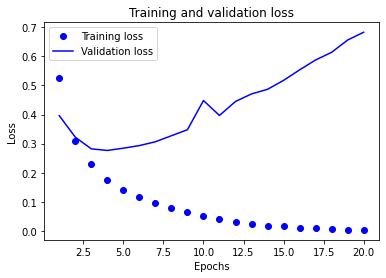

In [69]:
# code list 3-9 Plot the training loss and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

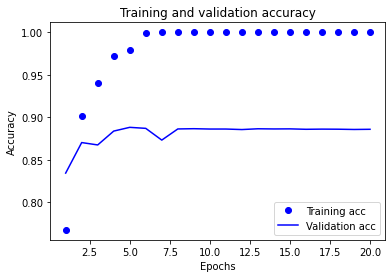

In [35]:
# code list 3-10 plot training accuracy and validation accuracy
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 4.4.2 Add weights regularization

In [50]:
#Code list 4-6 Add L2 weight regularization to model
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [51]:
# code list 3-4 compile model
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [52]:
# code list 3-7 assigned validation_data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
# code list 3-8 training model
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 1.1010 - acc: 0.7315 - val_loss: 0.7328 - val_acc: 0.8381
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6833 - acc: 0.8424 - val_loss: 0.7238 - val_acc: 0.7691
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.6347 - acc: 0.8469 - val_loss: 0.6313 - val_acc: 0.8480
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6018 - acc: 0.8571 - val_loss: 0.6211 - val_acc: 0.8465
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5832 - acc: 0.8631 - val_loss: 0.6244 - val_acc: 0.8369
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5767 - acc: 0.8612 - val_loss: 0.5710 - val_acc: 0.8630
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5640 - acc: 0.8649 - val_loss: 0.6020 - val_acc: 0.8448
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5527 - a

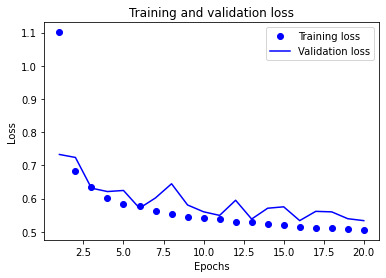

In [54]:
# code list 3-9 Plot the training loss and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4.4.3 Add dropout regularization

In [59]:
from keras import models
from keras import layers
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
# code list 3-4 compile model
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# code list 3-7 assigned validation_data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# code list 3-8 training model
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6363 - acc: 0.6313 - val_loss: 0.5281 - val_acc: 0.8277
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5234 - acc: 0.7675 - val_loss: 0.4105 - val_acc: 0.8689
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4374 - acc: 0.8188 - val_loss: 0.3471 - val_acc: 0.8838
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3693 - acc: 0.8571 - val_loss: 0.2990 - val_acc: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3106 - acc: 0.8871 - val_loss: 0.2836 - val_acc: 0.8914
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2716 - acc: 0.9072 - val_loss: 0.2721 - val_acc: 0.8913
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2405 - acc: 0.9207 - val_loss: 0.2739 - val_acc: 0.8928
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2157 - a

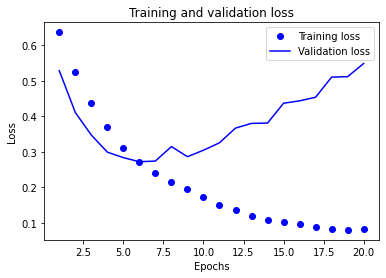

In [61]:
# code list 3-9 Plot the training loss and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()